

<h1 align=center><font size = 5>Final Exam</font></h1>
<h1 align=center><font size = 4>Python</font></h1>


For the portion of the exam, you will be using the flight dataset. The questions are aimed toward data analysis of flight delay for NYC in 2013. Pleaes download the flight_data.csv from the submission folder. This file contains dataset information about all the flights that departed from NYC (e.g. EWR, JFK and LGA) in 2013 which is 336,776 flights in total. Please submit the completed jupyter notebook file to D2L. 




## Question 8

 - Get the summary statistics of the data 
 - Get the number of rows and columns
 - Find out the number of scheduled departures planned by carriers

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns #import Seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Read the dataset
flight_data = pd.read_csv('flight_data.csv')
flight = pd.DataFrame(flight_data)
flight.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [4]:
# Summary statistics data of dataset
flight.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [8]:
# Number of row and column from dataset: 19 columns, 336776 rows
flight.info

<bound method DataFrame.info of         year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin de

In [9]:
# The number of scheduled departures planned by carriers
flight['carrier'].value_counts()

carrier
UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: count, dtype: int64

## Question 9

Define the total number of unique airline headed to BOS from NYC and print out this sentence:
        " Total number of carrier headed to 'BOS' from 'NYC' is `?`"

In [23]:
# Query data of flight from NYC to BOS
to_bos = flight[flight['dest'] == 'BOS']
# Get unique carriers for flights from 'NYC' to 'BOS'
uni_carriers = to_bos['carrier'].nunique()
# print sentence
print(f"Total number of carrier headed to 'BOS' from 'NYC' is {uni_carriers}")

Total number of carrier headed to 'BOS' from 'NYC' is 7


## Question 10

Display top 10 destination flights from NYC in a bar graph, add title and labels for axes

In [25]:
# Create frequency table of top 10 destination flights from NYC 
top_flight = flight["dest"].value_counts().head(11)
top_flight

dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
CLT    14064
SFO    13331
FLL    12055
MIA    11728
DCA     9705
DTW     9384
Name: count, dtype: int64

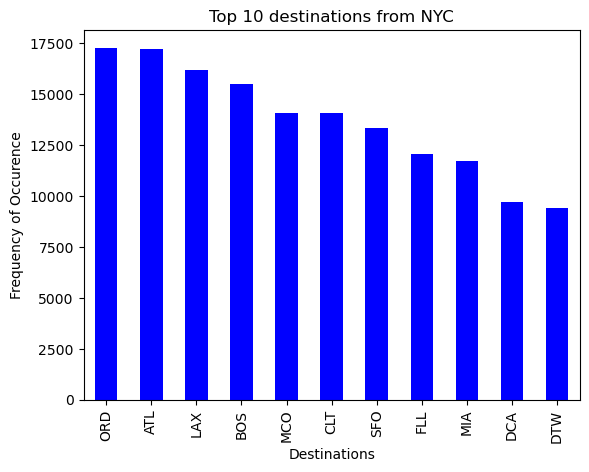

In [28]:
# Display top 10 destination flights from NYC in a bar graph
top_flight.plot(kind='bar', color='blue')
plt.title("Top 10 destinations from NYC")
plt.xlabel("Destinations")
plt.ylabel("Frequency of Occurence")
plt.show()

## Question 11

Show the bar graph for average departure delay by origin, add title and labels for axes


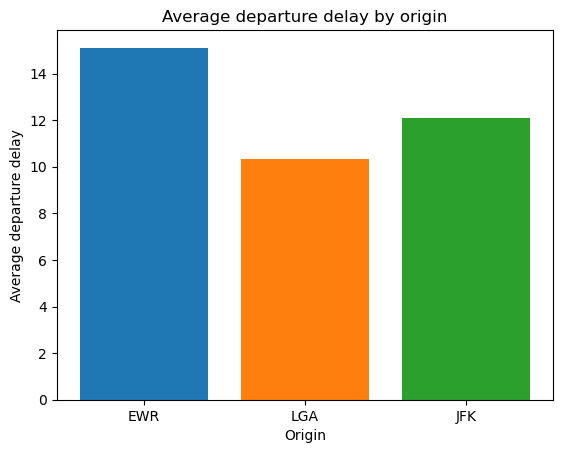

In [22]:
# Show the bar graph for average departure delay by origin
for i in flight["origin"].unique():
    mean=flight["dep_delay"][flight["origin"]==i].mean()
    plt.bar(i,mean)
plt.title("Average departure delay by origin")
plt.xlabel("Origin")
plt.ylabel("Average departure delay")
plt.show()